In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df = pd.read_csv('Breast_cancer_data.csv')
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

# Selecting features for classification (adjust the column names as needed)
X = df[['radius_mean', 'perimeter_mean', 'texture_mean', 'area_mean', 'smoothness_mean']]
y = df['diagnosis']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

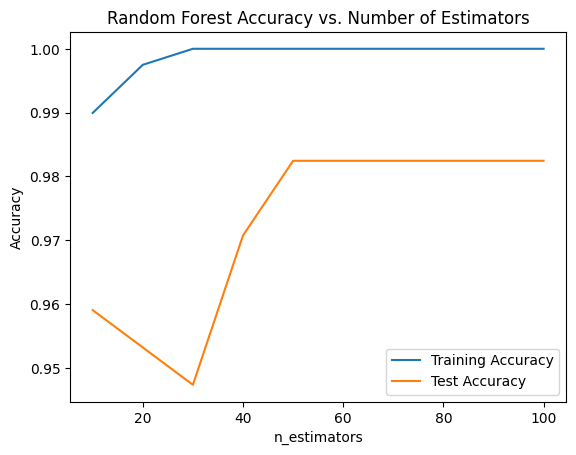

In [4]:
# 1. Random Forest
train_accuracies = []
test_accuracies = []
estimators = range(10, 101, 10)

for n in estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, rf.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, rf.predict(X_test)))

plt.plot(estimators, train_accuracies, label='Training Accuracy')
plt.plot(estimators, test_accuracies, label='Test Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs. Number of Estimators')
plt.legend()
plt.show()
#Overfitting as too many trees

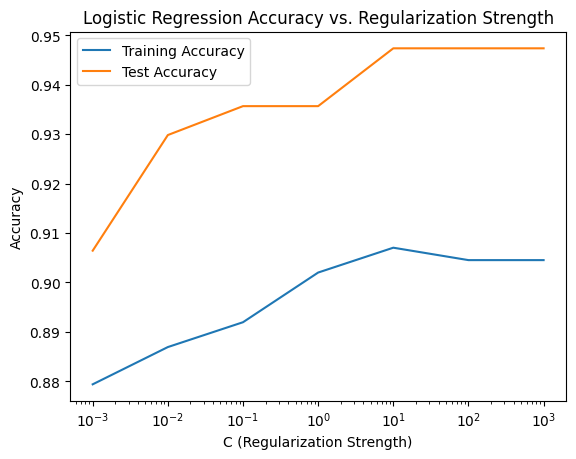

In [5]:
from sklearn.linear_model import LogisticRegression

train_accuracies = []
test_accuracies = []
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for C in C_values:
    log_reg = LogisticRegression(C=C, random_state=42, max_iter=5000)
    log_reg.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, log_reg.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, log_reg.predict(X_test)))

plt.plot(C_values, train_accuracies, label='Training Accuracy')
plt.plot(C_values, test_accuracies, label='Test Accuracy')
plt.xscale('log')
plt.xlabel('C (Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy vs. Regularization Strength')
plt.legend()
plt.show()


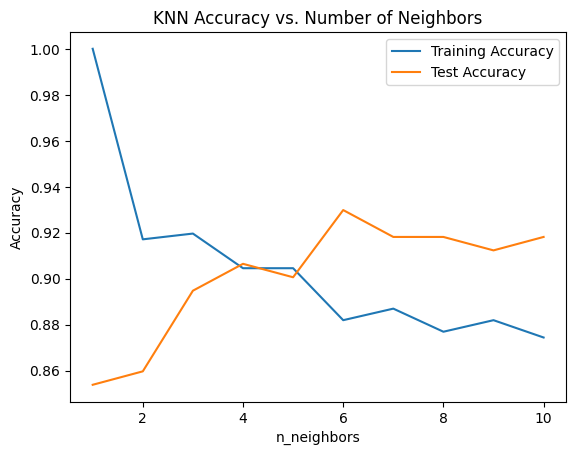

In [6]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

train_accuracies = []
test_accuracies = []
neighbors = range(1, 11)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, knn.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, knn.predict(X_test)))

plt.plot(neighbors, train_accuracies, label='Training Accuracy')
plt.plot(neighbors, test_accuracies, label='Test Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.legend()
plt.show()


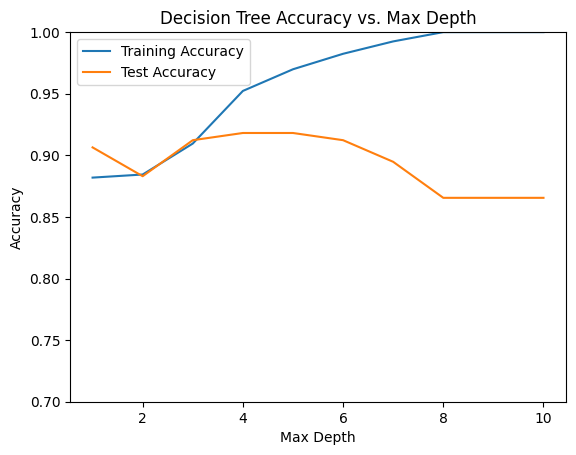

In [7]:
from sklearn.tree import DecisionTreeClassifier

train_accuracies = []
test_accuracies = []
max_depths = range(1, 11)

for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, dt.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, dt.predict(X_test)))

plt.plot(max_depths, train_accuracies, label='Training Accuracy')
plt.plot(max_depths, test_accuracies, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.ylim(0.70,1.00)
plt.legend()
plt.show()
